# Morfologia

In [90]:
from PIL import Image
import cv2
import numpy as np
import matplotlib.pyplot as plt

#### Wczytanie obrazu

W celu wykonania operacji morfologicznych na obrazie, należy najpierw go wczytać i przekonwertować do postaci monochromatycznej (skali szarości). Najłatwiej można tego dokonać za pomocą komendy 'Image.open' z biblioteki 'Pillow' oraz metody 'convert' z parametrem 'L'.  

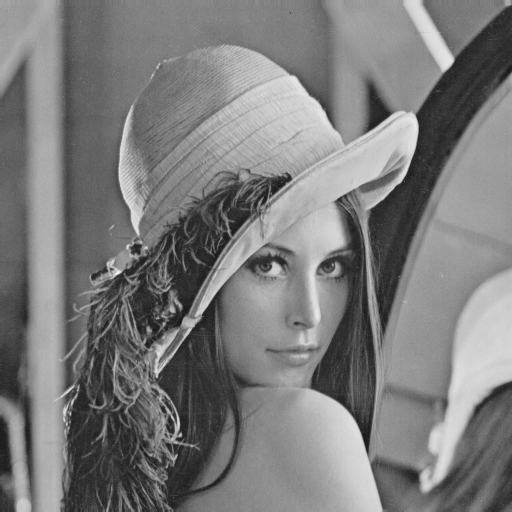

In [91]:
img = Image.open('../obrazy_testowe/lena_512x512.png').convert('L')
img

#### Binaryzacja

Następnie obraz należy zamienić na postać macierzową, za pomocą metody 'asarray' z biblioteki 'numpy'.
Na tak przetworzonym obrazie, można dokonać operacji binaryzacji, niezbędnej do wykonania operacji morfologicznych.
Binaryzacja oznacza przeskalowanie obrazu do 2 wartości (0 lub 1), w zależności od przyjętego progu.
Poniżej przedstawiono przykład binaryzacji dla 3 progów odcięcia - 25%, 50% i 75% maksymalnej wartości (255).
Operacji binaryzacji dokonano za pomocą metody 'threshold' z biblioteki 'openCV'. Do wyświetlenia obrazów użyto tym razem metody 'imshow' z pakietu 'matplotlib.pyplot', ponieważ zostały one wcześniej przekonwertowane na postać macierzową.  

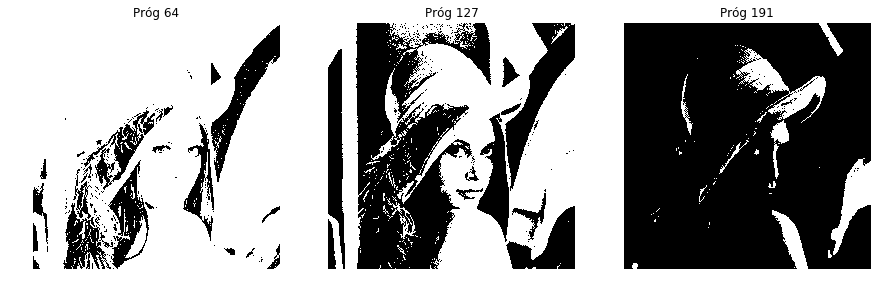

In [92]:
imgArray = np.asarray(img)
ret1, imgThresholded1 = cv2.threshold(imgArray, 64, 255, cv2.THRESH_BINARY)
ret2, imgThresholded2 = cv2.threshold(imgArray, 127, 255, cv2.THRESH_BINARY)
ret3, imgThresholded3 = cv2.threshold(imgArray, 191, 255, cv2.THRESH_BINARY)

plt.figure(1, figsize = (15, 10))

plt.subplot(131)
plt.title('Próg 64')
plt.axis('off')
plt.imshow(imgThresholded1, cmap = 'gray')

plt.subplot(132)
plt.title('Próg 127')
plt.axis('off')
plt.imshow(imgThresholded2, cmap = 'gray')

plt.subplot(133)
plt.title('Próg 191')
plt.axis('off')
plt.imshow(imgThresholded3, cmap = 'gray')

plt.show()

Do dalszych operacji wykorzystano jednak inny sposób binaryzacji - metodę Otsu. Jest to metoda, która wyznacza próg odcięcia w sposób automatyczny, bez konieczności ustalania go w sposób ręczny.

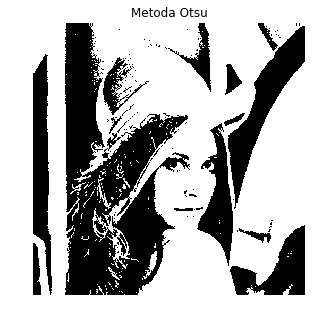

In [75]:
retOtsu, imgThresholdedOtsu = cv2.threshold(imgArray, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

plt.figure(1, figsize = (5, 5))
plt.imshow(imgThresholdedOtsu, cmap = 'gray')
plt.title('Metoda Otsu')
plt.axis('off')
plt.show()

#### Operacje morfologiczne

Na tak przetworzonym obrazie, można już wykonywać operacje morfologiczne. Konieczny jest wybór elementu strukturalnego (kernel) oraz jego wielkości. W poniższym przykładzie wykorzystano kwadrat o wielkości 5 pikseli. Za pomocą takiego elementu można wykonać szereg operacji, jak na przykład erozja, dylacja, otwarcie, czy zamknięcie. W każdym przypadku element strukturalny przesuwa się wzdłuż obrazu, a następnie dla każdego piksela sprawdza jego sądziedztwo. W zależności od wyboru algorytmu, można zaobserwować następujące różnice na obrazach wynikowych.

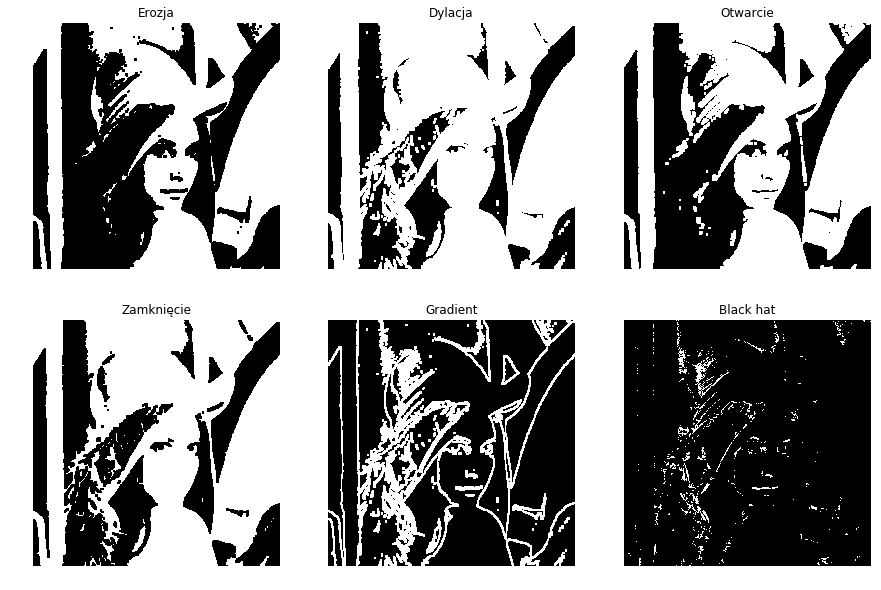

In [86]:
kernel = np.ones((5,5), np.uint8)
imgErosion = cv2.erode(imgThresholdedOtsu, kernel, iterations = 1)
imgDilation = cv2.dilate(imgThresholdedOtsu, kernel, iterations = 1)
imgOpening = cv2.morphologyEx(imgThresholdedOtsu, cv2.MORPH_OPEN, kernel)
imgClosing = cv2.morphologyEx(imgThresholdedOtsu, cv2.MORPH_CLOSE, kernel)
imgGradient = cv2.morphologyEx(imgThresholdedOtsu, cv2.MORPH_GRADIENT, kernel)
imgBlackhat = cv2.morphologyEx(imgThresholdedOtsu, cv2.MORPH_BLACKHAT, kernel)

plt.figure(1, figsize = (15, 10))

plt.subplot(231)
plt.imshow(imgErosion, cmap = 'gray')
plt.title('Erozja')
plt.axis('off')

plt.subplot(232)
plt.imshow(imgDilation, cmap = 'gray')
plt.title('Dylacja')
plt.axis('off')

plt.subplot(233)
plt.imshow(imgOpening, cmap = 'gray')
plt.title('Otwarcie')
plt.axis('off')

plt.subplot(234)
plt.imshow(imgClosing, cmap = 'gray')
plt.title('Zamknięcie')
plt.axis('off')

plt.subplot(235)
plt.imshow(imgGradient, cmap = 'gray')
plt.title('Gradient')
plt.axis('off')

plt.subplot(236)
plt.imshow(imgBlackhat, cmap = 'gray')
plt.title('Black hat')
plt.axis('off')

plt.show()